## Import librari

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import os
import time
from IPython import display


# Download and read file entities

In [3]:
# dataset_url = "https://raw.githubusercontent.com/AndiAlifs/sistem_cerdas_chatbot_selma/master/entities.json"

In [7]:
# read json file
with open('entities.json') as f:
    data = json.load(f)

JSONDecodeError: Expecting ',' delimiter: line 322 column 21 (char 8746)

In [ ]:
data

{'entities': {'seleksi_masuk': [{'tag': 'snmptn',
    'pattern': ['seleksi nasional',
     'snmptn',
     'jalur undangan',
     'jalur prestasi']},
   {'tag': 'sbmptn', 'pattern': ['seleksi bersama', 'sbmptn', 'utbk']},
   {'tag': 'afirmasi',
    'pattern': ['afirmasi', 'jalur khusus', 'jalur khusus lainnya']},
   {'tag': 'mandiri',
    'pattern': ['mandiri', 'jalur mandiri', 'jalur mandiri lainnya']},
   {'tag': 'reguler',
    'pattern': ['reguler', 'jalur reguler', 'jalur reguler lainnya']},
   {'tag': 'rapor', 'pattern': ['nilai rapor', 'jalur nilai rapor']},
   {'tag': 'utbk', 'pattern': ['nilai utbk', 'jalur nilai utbk']}],
  'fakultas': [{'tag': 'filkom',
    'pattern': ['fakultas ilmu komputer', 'filkom', 'ilmu komputer']},
   {'tag': 'fisip',
    'pattern': ['fakultas ilmu sosial dan ilmu politik',
     'fisip',
     'ilmu sosial dan ilmu politik',
     'sosial',
     'politik']},
   {'tag': 'fk', 'pattern': ['fk', 'kedokteran', 'fakultas kedokteran']},
   {'tag': 'fkh',
    '

# Splitting file entities

In [ ]:
data_selksiMasuk = data['entities']['seleksi_masuk']
data_fakultas = data['entities']['fakultas']
data_prodi = data['entities']['prodi']

In [ ]:
tag = []
patterns = []

for i in data_selksiMasuk:
    for pattern in i['pattern']:
        tag.append(i['tag'])
        patterns.append(pattern)

dfSeleksiMasuk = pd.DataFrame({'tag': tag, 'patterns': patterns})

In [ ]:
tag = []
patterns = []

for i in data_fakultas:
    for pattern in i['pattern']:
        tag.append(i['tag'])
        patterns.append(pattern)

dfFakultas = pd.DataFrame({'tag': tag, 'patterns': patterns})

In [ ]:
tag = []
patterns = []

for i in data_prodi:
    for pattern in i['pattern']:
        tag.append(i['tag'])
        patterns.append(pattern)

dfProdi = pd.DataFrame({'tag': tag, 'patterns': patterns})

In [ ]:
# preprocessing data text
import re

def preprocessing_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', ' ', text)
    text = text.strip()
    return text

In [ ]:
#make callbacks when model accurcay hit 90%
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.9):
            print("\nReached 90% accuracy so cancelling training!")
            self.model.stop_training = True

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split


In [ ]:
# training model for seleksiMasuk
vectorizerSlekMasuk = TfidfVectorizer()
X = vectorizerSlekMasuk.fit_transform(dfSeleksiMasuk['patterns'].apply(preprocessing_text))
X = X.toarray()
Y = dfSeleksiMasuk['tag'].values

classCount = len(np.unique(Y))

label_encoderSeleksiMasuk = LabelEncoder()
integer_encoded = label_encoderSeleksiMasuk.fit_transform(Y)
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
Y = onehot_encoder.fit_transform(integer_encoded)

X_train = X
y_train = Y

take = 0.2
x_test = X_train[:int(len(X_train)*take)]
y_test = y_train[:int(len(y_train)*take)]

modelForSeleksiMasuk = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(classCount, activation='softmax'),
])

modelForSeleksiMasuk.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

callbacks = myCallback()

history = modelForSeleksiMasuk.fit(X_train, y_train,
                        validation_data=(x_test, y_test),epochs=100, callbacks=[callbacks])

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 1.9540 - accuracy: 0.0500 - val_loss: 1.9674 - val_accuracy: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 0s 32ms/step - loss: 1.9419 - accuracy: 0.0500 - val_loss: 1.9487 - val_accuracy: 0.0000e+00
Epoch 3/100
1/1 [==============================] - 0s 47ms/step - loss: 1.9321 - accuracy: 0.0500 - val_loss: 1.9326 - val_accuracy: 0.5000
Epoch 4/100
1/1 [==============================] - 0s 46ms/step - loss: 1.9229 - accuracy: 0.2000 - val_loss: 1.9178 - val_accuracy: 0.5000
Epoch 5/100
1/1 [==============================] - 0s 62ms/step - loss: 1.9139 - accuracy: 0.3500 - val_loss: 1.9055 - val_accuracy: 0.5000
Epoch 6/100
1/1 [==============================] - 0s 43ms/step - loss: 1.9054 - accuracy: 0.3500 - val_loss: 1.8936 - val_accuracy: 0.5000
Epoch 7/100
1/1 [==============================] - 0s 34ms/step - loss: 1.8968 - accuracy: 0.4500 - val_loss: 1.8804 - val_accuracy: 0.7500
Epoch 8/100
1/

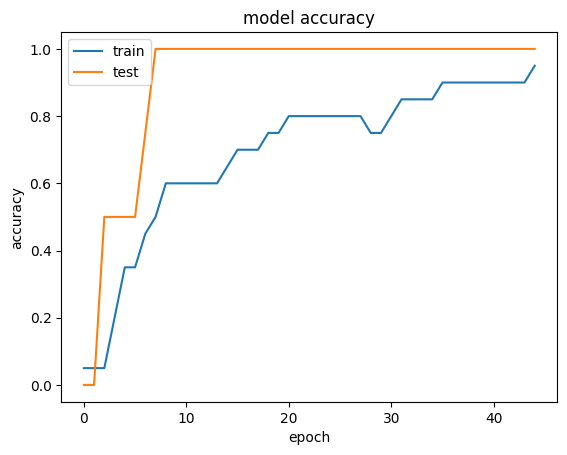

In [ ]:
# plot the model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'test'], loc='upper left')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

Text(0.5, 0, 'epoch')

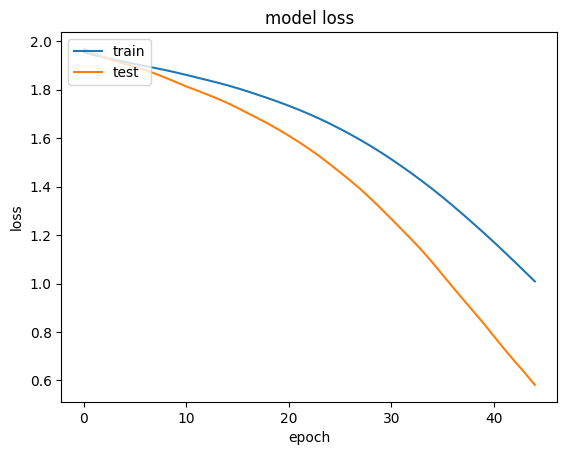

In [ ]:
# plot the model loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'test'], loc='upper left')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

In [ ]:
# training model for fakultas
vectorizerFakultas = TfidfVectorizer()
X = vectorizerFakultas.fit_transform(dfFakultas['patterns'].apply(preprocessing_text))
X = X.toarray()
Y = dfFakultas['tag'].values

classCount = len(np.unique(Y))

label_encoderFakultas = LabelEncoder()
integer_encoded = label_encoderFakultas.fit_transform(Y)
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
Y = onehot_encoder.fit_transform(integer_encoded)

X_train = X
y_train = Y

take = 0.2
x_test = X_train[:int(len(X_train)*take)]
y_test = y_train[:int(len(y_train)*take)]

modelForFakultas = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(classCount, activation='softmax'),
])

modelForFakultas.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

callbacks = myCallback()

history = modelForFakultas.fit(X_train, y_train,
                        validation_data=(x_test, y_test),epochs=100, callbacks=[callbacks])

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 2.0802 - accuracy: 0.1071 - val_loss: 2.0474 - val_accuracy: 0.2000
Epoch 2/100
1/1 [==============================] - 0s 36ms/step - loss: 2.0693 - accuracy: 0.1786 - val_loss: 2.0380 - val_accuracy: 0.2000
Epoch 3/100
1/1 [==============================] - 0s 44ms/step - loss: 2.0603 - accuracy: 0.1786 - val_loss: 2.0275 - val_accuracy: 0.2000
Epoch 4/100
1/1 [==============================] - 0s 37ms/step - loss: 2.0520 - accuracy: 0.1786 - val_loss: 2.0156 - val_accuracy: 0.4000
Epoch 5/100
1/1 [==============================] - 0s 42ms/step - loss: 2.0435 - accuracy: 0.2143 - val_loss: 2.0054 - val_accuracy: 0.6000
Epoch 6/100
1/1 [==============================] - 0s 96ms/step - loss: 2.0353 - accuracy: 0.2857 - val_loss: 1.9954 - val_accuracy: 0.6000
Epoch 7/100
1/1 [==============================] - 0s 48ms/step - loss: 2.0271 - accuracy: 0.2857 - val_loss: 1.9845 - val_accuracy: 0.6000
Epoch 8/100
1/1 [=====

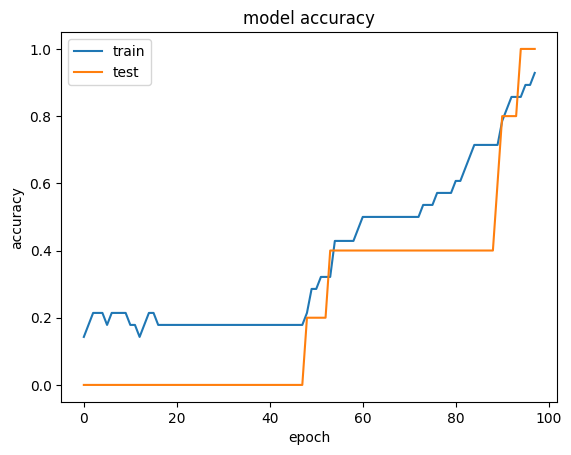

In [ ]:
# plot the accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

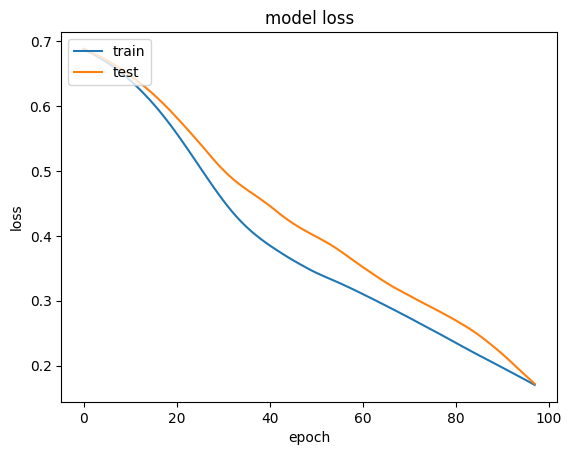

In [ ]:
# plot the model loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#training for prodi
vectorizerProdi = TfidfVectorizer()
X = vectorizerProdi.fit_transform(dfProdi['patterns'].apply(preprocessing_text))
X = X.toarray()
Y = dfProdi['tag'].values

classCount = len(np.unique(Y))

label_encoderProdi = LabelEncoder()
integer_encoded = label_encoderProdi.fit_transform(Y)
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)

Y = onehot_encoder.fit_transform(integer_encoded)

X_train = X
y_train = Y

take = 0.2

x_test = X_train[:int(len(X_train)*take)]
y_test = y_train[:int(len(y_train)*take)]

modelForProdi = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(classCount, activation='sigmoid'),
])

modelForProdi.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])

callbacks = myCallback()

history = modelForProdi.fit(X_train, y_train,
                        validation_data=(x_test, y_test),epochs=150, callbacks=[callbacks])
                        

Epoch 1/150
1/1 [==============================] - 1s 774ms/step - loss: 0.6927 - accuracy: 0.1429 - val_loss: 0.6808 - val_accuracy: 0.2500
Epoch 2/150
1/1 [==============================] - 0s 34ms/step - loss: 0.6816 - accuracy: 0.2381 - val_loss: 0.6691 - val_accuracy: 0.5000
Epoch 3/150
1/1 [==============================] - 0s 33ms/step - loss: 0.6707 - accuracy: 0.2857 - val_loss: 0.6577 - val_accuracy: 0.5000
Epoch 4/150
1/1 [==============================] - 0s 28ms/step - loss: 0.6600 - accuracy: 0.2857 - val_loss: 0.6463 - val_accuracy: 0.5000
Epoch 5/150
1/1 [==============================] - 0s 30ms/step - loss: 0.6494 - accuracy: 0.3333 - val_loss: 0.6349 - val_accuracy: 0.5000
Epoch 6/150
1/1 [==============================] - 0s 30ms/step - loss: 0.6387 - accuracy: 0.3810 - val_loss: 0.6232 - val_accuracy: 0.5000
Epoch 7/150
1/1 [==============================] - 0s 35ms/step - loss: 0.6278 - accuracy: 0.3333 - val_loss: 0.6113 - val_accuracy: 0.5000
Epoch 8/150
1/1 [==

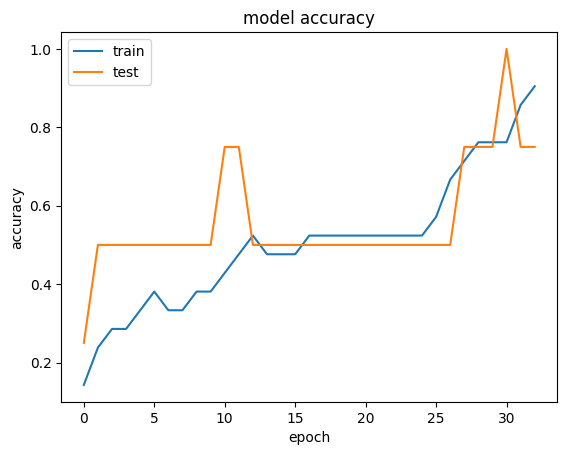

In [ ]:
# plot the model akurasi
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'test'], loc='upper left')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()


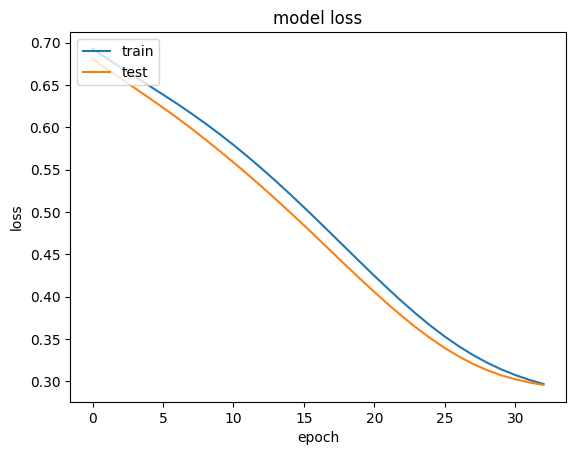

In [ ]:
# plot the model loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'test'], loc='upper left')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
def testAllModel(textData):
    print(textData)
    textData = preprocessing_text(textData)

    textDataForSeleksiMasuk = vectorizerSlekMasuk.transform([textData])
    textDataForSeleksiMasuk = textDataForSeleksiMasuk.toarray()

    textDataForFakultas = vectorizerFakultas.transform([textData])
    textDataForFakultas = textDataForFakultas.toarray()

    textDataForProdi = vectorizerProdi.transform([textData])
    textDataForProdi = textDataForProdi.toarray()

    pred = modelForSeleksiMasuk.predict(textDataForSeleksiMasuk)
    pred = np.argmax(pred, axis=1)
    pred = label_encoderSeleksiMasuk.inverse_transform(pred)
    print("seleksi masuk", pred)

    pred = modelForFakultas.predict(textDataForFakultas)
    pred = np.argmax(pred, axis=1)
    pred = label_encoderFakultas.inverse_transform(pred)
    print("fakultas", pred)

    pred = modelForProdi.predict(textDataForProdi)
    pred = np.argmax(pred, axis=1)
    pred = label_encoderProdi.inverse_transform(pred)
    print("prodi", pred)

In [ ]:
textData = 'Selamat siang, saya Andi Alifsyah ingin mendaftar di ilmu komputer prodi teknik informatika, saya ingin mengetahui informasi terkait penerimaan mahasiswa baru di Universitas Brawijaya untuk jalur utbk'
testAllModel(textData)

print("---------------")

textData = 'Selamat siang, saya ingin bertanya mengenai daftar ulang bagi mahasiswa kedokteran'
testAllModel(textData)


NameError: name 'testAllModel' is not defined